# Accuracy Evaluation Script of Hidden Markov Model for Part-of-Speech tagging task

## Team Details

|               |           |                               |
|---------------|-----------|-------------------------------|
| Subject       |           | Natural Language Processing   |
| Supervisor    |           | Prof. Tulika Saha             |
| Group No.     |           | 6                             |
| Member 1      | Name:     | Shreya Gupta                  |
|               | Roll No:  | MT2025724                     |
| Member 2      | Name:     | Anirudh Sharma                |
|               | Roll No:  | MT2025732                     |
| Member 3      | Name:     | Saatvik Sinha                 |
|               | Roll No:  | MT2025722                     |
| Member 4      | Name:     | Varshith M Gowda              |
|               | Roll No:  | BT2024227                     |

## Overall Summary

| Metrics of the Report             |                   |
|-----------------------------------|-------------------|
| Training Dataset Size             | 12544 sentences   |
| Test Dataset Size                 | 2077 sentences    |
| No. of Unique Words               | 9875              |
| No. of POS Tags                   | 17                |
| Micro Accuracy on Test Dataset    | 89.49%            |
| Macro Accuracy on Test Dataset    | 83.39%            |

## System Imports

Setup code and data file paths for use

In [36]:
# Enabling access to files within src folder

import sys
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import pylab as p

sys.path.append(str(Path.cwd() / "src"))

In [ ]:
# Importing necessary modules

from conllu_parser import parse_conllu_file
from hmm_viterbi import HiddenMarkovModel

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
# Path to the dataset file
trainpath = "data/UD_English-EWT/en_ewt-ud-train.conllu"
testpath = "data/UD_English-EWT/en_ewt-ud-test.conllu"

## Load Training Data

Parse the training corpus to extract sentences and POS tags.

In [5]:
training_corpus = []
with open(trainpath, encoding='utf-8') as f:
    for sentence_data in parse_conllu_file(f):
        training_corpus.append(sentence_data['pos_tags'])

print(f"Loaded {len(training_corpus)} sentences from training data")
print(f"Example: {training_corpus[0]}")

Loaded 12544 sentences from training data
Example: [('Al', 'PROPN'), ('-', 'PUNCT'), ('Zaman', 'PROPN'), (':', 'PUNCT'), ('American', 'ADJ'), ('forces', 'NOUN'), ('killed', 'VERB'), ('Shaikh', 'PROPN'), ('Abdullah', 'PROPN'), ('al', 'PROPN'), ('-', 'PUNCT'), ('Ani', 'PROPN'), (',', 'PUNCT'), ('the', 'DET'), ('preacher', 'NOUN'), ('at', 'ADP'), ('the', 'DET'), ('mosque', 'NOUN'), ('in', 'ADP'), ('the', 'DET'), ('town', 'NOUN'), ('of', 'ADP'), ('Qaim', 'PROPN'), (',', 'PUNCT'), ('near', 'ADP'), ('the', 'DET'), ('Syrian', 'ADJ'), ('border', 'NOUN'), ('.', 'PUNCT')]


## Train HMM Model

Create and train a Hidden Markov Model using the Viterbi algorithm.

In [7]:
model = HiddenMarkovModel(training_corpus, algorithm='viterbi', rarity_factor=0.01)

print(f"Model trained successfully!")
print(f"Number of unique words: {model.n_observations}")
print(f"Number of POS tags: {model.n_hidden_states}")
print(f"POS tags: {model.unique_pos}")

Model trained successfully!
Number of unique words: 9875
Number of POS tags: 17
POS tags: ['ADJ', 'ADP', 'ADV', 'AUX', 'CCONJ', 'DET', 'INTJ', 'NOUN', 'NUM', 'PART', 'PRON', 'PROPN', 'PUNCT', 'SCONJ', 'SYM', 'VERB', 'X']


## Load Test Data

Parse the test corpus to extract sentences and POS tags.

In [8]:
# Load test data
test_corpus = []
with open(testpath, encoding='utf-8') as f:
    for sentence_data in parse_conllu_file(f):
        test_corpus.append(sentence_data['pos_tags'])

print(f"Loaded {len(test_corpus)} sentences from test data")
print(f"Example: {test_corpus[0]}")

Loaded 2077 sentences from test data
Example: [('What', 'PRON'), ('if', 'SCONJ'), ('Google', 'PROPN'), ('Morphed', 'VERB'), ('Into', 'ADP'), ('GoogleOS', 'PROPN'), ('?', 'PUNCT')]


## Predict POS Tags

Use the trained model to predict POS tags for test sentences.

In [9]:
predictions = []
for sentence in test_corpus:
    words = [word for word, tag in sentence]
    predicted_tags = model.predict(words)
    predictions.append(list(zip(words, predicted_tags)))

print(f"Made predictions for {len(predictions)} sentences")
print(f"Example prediction: {predictions[0]}")
print(f"Actual tags:        {test_corpus[0]}")

Made predictions for 2077 sentences
Example prediction: [('What', 'PRON'), ('if', 'SCONJ'), ('Google', 'PROPN'), ('Morphed', 'PROPN'), ('Into', 'PROPN'), ('GoogleOS', 'PROPN'), ('?', 'PUNCT')]
Actual tags:        [('What', 'PRON'), ('if', 'SCONJ'), ('Google', 'PROPN'), ('Morphed', 'VERB'), ('Into', 'ADP'), ('GoogleOS', 'PROPN'), ('?', 'PUNCT')]


## Evaluate Model Performance

Calculate accuracy scores using micro and macro averaging.

In [ ]:
# Evaluate model using score method

from hmm_viterbi import micro_accuracy_score, macro_accuracy_score

micro_acc = model.score(test_corpus, scorer=micro_accuracy_score)
macro_acc = model.score(test_corpus, scorer=macro_accuracy_score)

print(f"Micro Accuracy: {micro_acc:.4f}")
print(f"Macro Accuracy: {macro_acc:.4f}")

## Confusion Matrix

Display confusion matrix to analyze per-class performance.

In [43]:
from hmm_viterbi import confusion_matrix, display_confusion_matrix

# Extract true and predicted tags
true_tags = []
predicted_tags = []
for sentence in test_corpus:
    true_tags.extend([tag for word, tag in sentence])
    
for sentence in predictions:
    predicted_tags.extend([tag for word, tag in sentence])

# Create confusion matrix
cm = confusion_matrix(true_tags, predicted_tags)
display_confusion_matrix(cm)

         ADJ   ADP   ADV   AUX CCONJ   DET  INTJ  NOUN   NUM  PART  PRON PROPN PUNCT SCONJ   SYM  VERB     X
   ADJ  1487     7    38     0     0     5     1    79    18     0     0    81     0     1     0    68     3
   ADP     1  1888    43     0     1     0     0     6     1    47     0     4     0    24     1     8     1
   ADV    58    54   997     0     2    12     3    11     0     3     7    17     0    14     0    13     0
   AUX     0     0     0  1510     0     0     0     3     1     0     1     1     0     0     0    26     1
 CCONJ     0     1     0     0   729     3     0     1     0     0     0     0     0     0     0     0     2
   DET     0     0    18     0     0  1848     2     0     0     0    25     2     0     1     1     0     0
  INTJ     3     1     2     0     0     1    92     1     0     0     1    15     0     1     0     4     0
  NOUN    95     4     4     4     0     2     0  3501    26     0     0   363     0     0     5   109    10
   NUM    19     0 

## Effect of Rarity Factor



In [79]:
train_accuracy, test_accuracy = [], []
rarity_factors = 9 * np.logspace(-1, -3, 10)
for rarity_factor in rarity_factors:
    _model = HiddenMarkovModel(training_corpus, rarity_factor=rarity_factor)
    train_accuracy.append(_model.score(training_corpus))
    test_accuracy.append(_model.score(test_corpus))

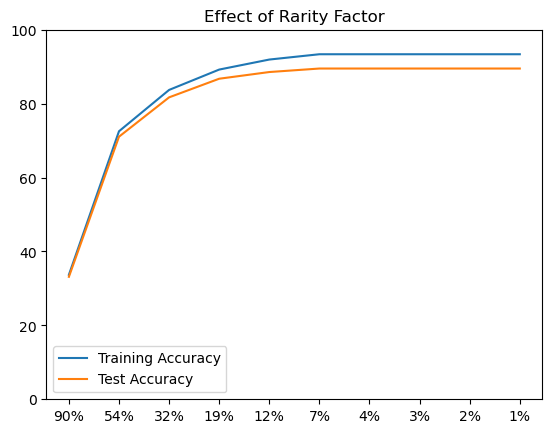

In [81]:
plt.title('Effect of Rarity Factor')
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.xticks(range(len(rarity_factors)), ["%.0f%%" % (100*f) for f in rarity_factors])
plt.ylim(0, 1)
plt.yticks(list(map(lambda x: x / 5, range(6))), map(lambda x: str(20 * x), range(6)))
plt.legend()
plt.show()